# Action Classification - Implementation

In [22]:
import pandas as pd

Original_Data=pd.read_csv("final_wearable_antenna_dataset_real_world.csv")
print(Original_Data.columns)
Original_Data.describe()
print(Original_Data)

Index(['Activity', 'RSSI (dBm)', 'SNR (dB)', 'Path Loss (dB)',
       'Delay Spread (s)', 'Angular Spread (degrees)', 'Doppler Shift (Hz)',
       'Coherence Bandwidth (Hz)', 'Shadowing Effect (dB)', 'Antenna Position',
       'Frequency (MHz)', 'Material Used', 'Antenna Structure',
       'Antenna Width (mm)', 'Antenna Length (mm)', 'Relative Permittivity',
       'Gain (dBi)', 'SAR (W/kg)', 'Antenna Thickness (mm)', 'DGS Presence',
       'Substrate Type', 'Feeding Type', 'Return Loss (dB)',
       'Bending Tolerance (degrees)', 'Antenna Azimuth Angle',
       'Antenna Elevation Angle', 'Antenna X Position', 'Antenna Y Position',
       'S11 (dB)', 'S21 (dB)', 'Theta', 'Phi', 'E-field (dB)', 'H-field (dB)',
       'Antenna Z Position'],
      dtype='object')
      Activity  RSSI (dBm)   SNR (dB)  Path Loss (dB)  Delay Spread (s)  \
0      jumping         -90  21.717230       75.753308      1.880339e-08   
1      sitting         -60  19.104551       87.795303      1.168706e-09   
2   

In [23]:
Selected_Data=Original_Data[["Activity", "RSSI (dBm)", "Delay Spread (s)", "Angular Spread (degrees)", "Antenna Azimuth Angle", "Antenna Elevation Angle", "Antenna X Position", "Antenna Y Position", "Antenna Z Position"]]

Selected_Data.head(10)

,Activity,RSSI (dBm),Delay Spread (s),Angular Spread (degrees),Antenna Azimuth Angle,Antenna Elevation Angle,Antenna X Position,Antenna Y Position,Antenna Z Position
0,jumping,-90,1.880339e-08,312.052675,154.539859,113.439961,24.542713,35.623558,13.078977
1,sitting,-60,1.168706e-09,294.494160,268.896904,4.139804,2.413955,3.961305,4.250720
2,sitting,-65,1.978535e-08,256.809413,219.315093,97.671753,36.809306,19.712762,11.718897
3,standing,-80,2.915887e-09,325.918341,87.166137,74.409703,43.763699,10.071989,47.371880
4,running,-80,1.499450e-08,207.094426,144.183773,112.667494,41.861291,43.143517,28.547269
5,standing,-95,1.163924e-08,88.631922,0.252558,80.647049,31.720517,13.825262,35.029203
6,sitting,-60,4.807488e-08,325.194308,203.299804,114.868442,18.855290,49.231015,41.944735
7,jumping,-90,4.861848e-08,214.948145,100.739214,67.326575,45.418772,20.374450,48.510558
8,sleeping,-75,7.010074e-09,231.551893,6.445221,114.742380,21.484633,9.522696,25.751826
9,walking,-75,4.325834e-08,330.683216,6.427511,14.583071,47.935224,43.924598,46.822566


In [24]:
Selected_Data.describe()

,RSSI (dBm),Delay Spread (s),Angular Spread (degrees),Antenna Azimuth Angle,Antenna Elevation Angle,Antenna X Position,Antenna Y Position,Antenna Z Position
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,-80.256000,2.533802e-08,180.321200,178.600254,90.488274,25.258493,25.206997,25.218548
std,12.920056,1.416932e-08,103.978789,104.080512,51.310610,14.466012,14.402252,14.588570
min,-100.000000,1.000296e-09,0.022451,0.010392,0.019423,0.009176,0.007612,0.012339
25%,-90.000000,1.318696e-08,91.000257,89.422139,46.452175,12.828771,12.853622,12.350592
50%,-80.000000,2.536596e-08,179.351135,175.948718,90.390710,25.332172,25.117876,25.289785
75%,-70.000000,3.764514e-08,270.975410,267.412383,135.294889,37.897664,37.694677,38.009975
max,-60.000000,4.999889e-08,359.998484,359.979551,179.965673,49.999864,49.992739,49.996528


# Outliers and Normalize

In [25]:
from sklearn.preprocessing import MinMaxScaler

# Display column names
print("Column Names:")
print(Selected_Data.columns)

# Check for missing values
print("\nMissing Values in Each Column:")
print(Selected_Data.isnull().sum())

# Drop rows with missing values (or use df.fillna() for imputation)
Selected_Data.dropna(inplace=True)
import numpy as np
from scipy import stats  # Make sure this is imported

# Select only numeric columns for z-score calculation
numeric_data = Selected_Data.select_dtypes(include=[np.number])

# Calculate z-scores for numeric columns
z_scores = np.abs(stats.zscore(numeric_data))

# Keep rows where all z-scores are less than 3 (no outliers)
Removed_outlier = Selected_Data[(z_scores < 3).all(axis=1)]

# # Initialize scaler
scaler = MinMaxScaler()

# Normalize numeric columns (excluding categorical "Activity")
columns_to_normalize = Removed_outlier.columns.drop("Activity")
Removed_outlier[columns_to_normalize] = scaler.fit_transform(Removed_outlier[columns_to_normalize])
print(Removed_outlier)

# If you have time-series data and need to resample/interpolate:
if 'timestamp' in Removed_outlier.columns:
    Removed_outlier['timestamp'] = pd.to_datetime(Removed_outlier['timestamp'])
    Removed_outlier.set_index('timestamp', inplace=True)
    Removed_outlier = Removed_outlier.resample('1S').mean()  # Resample to 1-second intervals
    Removed_outlier.interpolate(method='linear', inplace=True)  # Fill missing values

# Final preview
print("\nPreprocessed Dataset Preview:")
print(Removed_outlier.head())
#selected data shape
print(Removed_outlier.shape)
print(Removed_outlier.describe)


Column Names:
Index(['Activity', 'RSSI (dBm)', 'Delay Spread (s)',
       'Angular Spread (degrees)', 'Antenna Azimuth Angle',
       'Antenna Elevation Angle', 'Antenna X Position', 'Antenna Y Position',
       'Antenna Z Position'],
      dtype='object')

Missing Values in Each Column:
Activity                    0
RSSI (dBm)                  0
Delay Spread (s)            0
Angular Spread (degrees)    0
Antenna Azimuth Angle       0
Antenna Elevation Angle     0
Antenna X Position          0
Antenna Y Position          0
Antenna Z Position          0
dtype: int64
      Activity  RSSI (dBm)  Delay Spread (s)  Angular Spread (degrees)  \
0      jumping       0.250          0.363339                  0.866808   
1      sitting       1.000          0.003437                  0.818031   
2      sitting       0.875          0.383379                  0.713345   
3     standing       0.500          0.039095                  0.905327   
4      running       0.500          0.285604              

C:\Users\danie\AppData\Local\Temp\ipykernel_7824\1210570235.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Selected_Data.dropna(inplace=True)


In [26]:
import pandas as pd

# Example: Create a sample DataFrame with an 'Activity' column
data = {
    'Activity': ['walking', 'running', 'sitting', 'jumping', 'sleeping', 'standing']
}
# removed_outlier = pd.DataFrame(data)

# Create a mapping of activity to scenario class
scenario_mapping = {
    "climbing stairs": 0,
    "jumping": 1,
    "leaning": 2,
    "running": 3,
    "sitting": 4,
    "sleeping": 5,
    "standing": 6,
    "walking": 7
}

# Apply the mapping
Removed_outlier['Scenario_Class'] = Removed_outlier['Activity'].map(scenario_mapping)

print(Removed_outlier)

# Label assignment or verification (ensure class column exists)
if 'Scenario_Class' in Removed_outlier.columns:
    print("\nUnique Scenario Labels:")
    print(Removed_outlier['Scenario_Class'].unique())
else:
    print("\nWarning: 'Scenario label' column not found. Please ensure your data is labeled.")


      Activity  RSSI (dBm)  Delay Spread (s)  Angular Spread (degrees)  \
0      jumping       0.250          0.363339                  0.866808   
1      sitting       1.000          0.003437                  0.818031   
2      sitting       0.875          0.383379                  0.713345   
3     standing       0.500          0.039095                  0.905327   
4      running       0.500          0.285604                  0.575238   
...        ...         ...               ...                       ...   
4995   running       0.750          0.270429                  0.868733   
4996   sitting       0.000          0.786217                  0.837988   
4997   running       0.750          0.567237                  0.504796   
4998  sleeping       0.750          0.639224                  0.234560   
4999  sleeping       0.250          0.536686                  0.662110   

      Antenna Azimuth Angle  Antenna Elevation Angle  Antenna X Position  \
0                  0.429285        

# Feature Engineering

### Mean, variance, standard deviation of RSS, delay spread, and angular spread.

In [27]:
import pandas as pd
import numpy as np

# Sample data (replace this with your actual data loading step)
data = {
    "RSSI (dBm)": np.random.randn(50),
    "Delay Spread (s)": np.random.randn(50),
    "Angular Spread (degrees)": np.random.randn(50),
    "Activity": ["walking"] * 50
}

# removed_outlier = pd.DataFrame(data)

# Define window size (e.g., 5 samples/window)
window_size = 5

# Function to extract rolling window features
def extract_window_features(df, columns, window_size):
    window_features = pd.DataFrame()

    for col in columns:
        window_features[f"{col}_mean"] = df[col].rolling(window=window_size, min_periods=1).mean()
        window_features[f"{col}_var"] = df[col].rolling(window=window_size, min_periods=1).var()
        window_features[f"{col}_std"] = df[col].rolling(window=window_size, min_periods=1).std()

    return window_features.dropna()

stat_columns = ["RSSI (dBm)", "Delay Spread (s)", "Angular Spread (degrees)"]

# Apply sliding window feature extraction
windowed_features = extract_window_features(Removed_outlier, stat_columns, window_size)
windowed_features = windowed_features.ffill()

# Combine original and windowed features
Stats_Feat = pd.concat([Removed_outlier, windowed_features], axis=1)

print(Stats_Feat.tail(20))
print(Stats_Feat.head(20))
print(type(Stats_Feat))


             Activity  RSSI (dBm)  Delay Spread (s)  Angular Spread (degrees)  \
4980  climbing stairs       0.250          0.349513                  0.676695   
4981         standing       0.125          0.396557                  0.748009   
4982         standing       1.000          0.350528                  0.648981   
4983         standing       0.750          0.297971                  0.706515   
4984          walking       0.625          0.502168                  0.093499   
4985         sleeping       0.125          0.546807                  0.291020   
4986          running       0.625          0.549584                  0.787052   
4987          running       0.250          0.373046                  0.934580   
4988          sitting       0.500          0.690214                  0.382567   
4989          walking       1.000          0.654573                  0.088280   
4990          leaning       0.125          0.110950                  0.191228   
4991         standing       

## Frequency domain features:
Use FFT or wavelet transforms to analyze frequency components of
signals.

In [28]:
### START FFT FEATURE EXTRACTION BLOCK ###

def extract_fft_features(df, columns, window_size):
    fft_features = pd.DataFrame(index=df.index)
    for col in columns:
        # Dominant frequency in window (ignoring DC component), Spectral Entropy
        dom_freqs = []
        spectral_entropies = []
        for i in range(len(df)):
            if i < window_size - 1:
                dom_freqs.append(np.nan)
                spectral_entropies.append(np.nan)
                continue
            window = df[col].iloc[i-window_size+1:i+1].values
            window = window - np.mean(window)  # Detrending for better frequency characterization
            fft_vals = np.fft.fft(window)
            fft_freqs = np.fft.fftfreq(window_size, d=1)  # d=1 as default sample spacing

            power = np.abs(fft_vals)**2
            power = power[:window_size//2]  # Use positive frequencies only
            fft_freqs = fft_freqs[:window_size//2]
            # Ignore the 0-Hz (DC) component
            if len(power) > 1:
                dom_idx = np.argmax(power[1:]) + 1
                dom_freq = fft_freqs[dom_idx]
                # Spectral Entropy
                P = power / np.sum(power)
                spectral_entropy = -np.sum(P * np.log2(P + 1e-12))
            else:
                dom_freq = 0.0
                spectral_entropy = 0.0
            dom_freqs.append(dom_freq)
            spectral_entropies.append(spectral_entropy)
        fft_features[f"{col}_fft_dom_freq"] = dom_freqs
        fft_features[f"{col}_fft_entropy"] = spectral_entropies
    return fft_features

fft_features = extract_fft_features(Removed_outlier, stat_columns, window_size)
fft_features = fft_features.ffill()

# Combine all features
Final_Feats = pd.concat([Stats_Feat, fft_features], axis=1)

print(Final_Feats.tail(20))
print(Final_Feats.head(20))
print(type(Final_Feats))


             Activity  RSSI (dBm)  Delay Spread (s)  Angular Spread (degrees)  \
4980  climbing stairs       0.250          0.349513                  0.676695   
4981         standing       0.125          0.396557                  0.748009   
4982         standing       1.000          0.350528                  0.648981   
4983         standing       0.750          0.297971                  0.706515   
4984          walking       0.625          0.502168                  0.093499   
4985         sleeping       0.125          0.546807                  0.291020   
4986          running       0.625          0.549584                  0.787052   
4987          running       0.250          0.373046                  0.934580   
4988          sitting       0.500          0.690214                  0.382567   
4989          walking       1.000          0.654573                  0.088280   
4990          leaning       0.125          0.110950                  0.191228   
4991         standing       

## Train-Test Split

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Prepare data: drop rows with NaN (from rolling or FFT at the start)
data_ready = Final_Feats.dropna().reset_index(drop=True)

# Split into features and target
X = data_ready.drop(['Activity'], axis=1)
y = data_ready['Activity']

# Split into train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# To store results
results_df = []

# Model Selection and Training:

## Decision Trees

In [30]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Instantiate and fit Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Store results
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

results_df.append({
    'Model': 'Decison Tree',
    'Accuracy': acc,
    'Precision': prec,
    'Recall': rec,
    'F1-score': f1
})

Accuracy: 1.0
                 precision    recall  f1-score   support

climbing stairs       1.00      1.00      1.00       198
        jumping       1.00      1.00      1.00       183
        leaning       1.00      1.00      1.00       182
        running       1.00      1.00      1.00       186
        sitting       1.00      1.00      1.00       185
       sleeping       1.00      1.00      1.00       182
       standing       1.00      1.00      1.00       192
        walking       1.00      1.00      1.00       191

       accuracy                           1.00      1499
      macro avg       1.00      1.00      1.00      1499
   weighted avg       1.00      1.00      1.00      1499



## Random Forest

Accuracy: 0.9979986657771848
                 precision    recall  f1-score   support

climbing stairs       1.00      1.00      1.00       198
        jumping       1.00      1.00      1.00       183
        leaning       1.00      0.99      1.00       182
        running       0.99      0.99      0.99       186
        sitting       0.99      0.99      0.99       185
       sleeping       1.00      1.00      1.00       182
       standing       1.00      1.00      1.00       192
        walking       1.00      1.00      1.00       191

       accuracy                           1.00      1499
      macro avg       1.00      1.00      1.00      1499
   weighted avg       1.00      1.00      1.00      1499



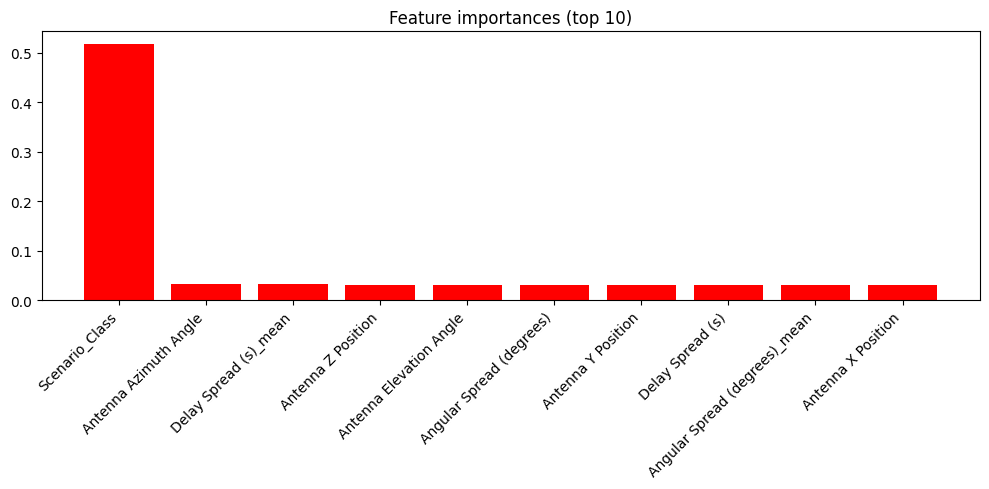

In [31]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Instantiate and train Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Optional: Feature importance plot
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 5))
plt.title("Feature importances (top 10)")
plt.bar(range(10), importances[indices[:10]], color="r", align="center")
plt.xticks(range(10), X.columns[indices[:10]], rotation=45, ha="right")
plt.tight_layout()
plt.show()

results_df.append({
    'Model': 'Random Forest',
    'Accuracy': acc,
    'Precision': prec,
    'Recall': rec,
    'F1-score': f1
})

## Support Vector Machine

In [32]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

results_df.append({
    'Model': 'SVM',
    'Accuracy': acc,
    'Precision': prec,
    'Recall': rec,
    'F1-score': f1
})

Accuracy: 0.961974649766511
                 precision    recall  f1-score   support

climbing stairs       0.96      1.00      0.98       198
        jumping       0.99      0.93      0.96       183
        leaning       0.96      0.98      0.97       182
        running       0.96      0.96      0.96       186
        sitting       0.95      0.97      0.96       185
       sleeping       0.99      0.92      0.95       182
       standing       0.92      0.97      0.95       192
        walking       0.98      0.96      0.97       191

       accuracy                           0.96      1499
      macro avg       0.96      0.96      0.96      1499
   weighted avg       0.96      0.96      0.96      1499



## K--Nearest Neighbors

In [33]:
# Import libraries
from sklearn.model_selection import  GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and fit GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

#Evaluate Best Model
best_knn = grid.best_estimator_
y_pred = best_knn.predict(X_test_scaled)

print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

results_df.append({
    'Model': 'KNN',
    'Accuracy': acc,
    'Precision': prec,
    'Recall': rec,
    'F1-score': f1
})

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Accuracy: 0.4683122081387592
Precision: 0.4721473745825863
Recall: 0.4683122081387592
F1 Score: 0.46948911862896586

Classification Report:
                  precision    recall  f1-score   support

climbing stairs       0.62      0.58      0.60       198
        jumping       0.44      0.49      0.47       183
        leaning       0.42      0.40      0.41       182
        running       0.41      0.45      0.43       186
        sitting       0.37      0.39      0.38       185
       sleeping       0.43      0.39      0.41       182
       standing       0.44      0.47      0.46       192
        walking       0.61      0.56      0.58       191

       accuracy                           0.47      1499
      macro avg       0.47      0.47      0.47      1499
   weighted avg       0.47      0.47      0.47      1499



C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [0.23877703 0.26936685 0.27165583 0.28652769 0.28251625 0.29338524
 0.29395708 0.30310811        nan 0.35458982        nan 0.40548416
        nan 0.43493194        nan 0.46381729]
  warnings.warn(


## XGBoost

In [34]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

# Convert string labels to integer labels
classes, y_train_int = np.unique(y_train, return_inverse=True)
_, y_test_int = np.unique(y_test, return_inverse=True)  # Use same mapping for test labels

# Instantiate and fit the model with integer labels:
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train, y_train_int)

# Predict
y_pred = xgb_clf.predict(X_test)

# Evaluate with integer labels; provide class names for the classification report
print("Accuracy:", accuracy_score(y_test_int, y_pred))
print(classification_report(y_test_int, y_pred, target_names=classes))

results_df.append({
    'Model': 'XGBoost',
    'Accuracy': acc,
    'Precision': prec,
    'Recall': rec,
    'F1-score': f1
})

C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [12:57:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 1.0
                 precision    recall  f1-score   support

climbing stairs       1.00      1.00      1.00       198
        jumping       1.00      1.00      1.00       183
        leaning       1.00      1.00      1.00       182
        running       1.00      1.00      1.00       186
        sitting       1.00      1.00      1.00       185
       sleeping       1.00      1.00      1.00       182
       standing       1.00      1.00      1.00       192
        walking       1.00      1.00      1.00       191

       accuracy                           1.00      1499
      macro avg       1.00      1.00      1.00      1499
   weighted avg       1.00      1.00      1.00      1499



## Naive Bayes

In [35]:
from sklearn.model_selection import  GridSearchCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import MinMaxScaler

if y_train.ndim > 1 and y_train.shape[1] > 1:
    y_train = np.argmax(y_train, axis=1)
    y_test = np.argmax(y_test, axis=1)

# Define classifier candidates and their parameter grids
nb_classifiers = {
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB()
}

param_grid = {
    'GaussianNB': {'var_smoothing': [1e-9, 1e-8, 1e-7]},
    'MultinomialNB': {'alpha': [0.1, 0.5, 1.0, 2.0]},
    'BernoulliNB': {'alpha': [0.1, 0.5, 1.0, 2.0]}
}

results = {}

for name, clf in nb_classifiers.items():
    print(f"\nTraining and tuning {name} ...")

    # Choose appropriate data: GaussianNB uses scaled continuous, others expect non-negative discrete
    if name == 'GaussianNB':
        X_tr, X_te = X_train, X_test
    else:
        # MultinomialNB and BernoulliNB expect count/binary features >=0
        scaler = MinMaxScaler()
        X_tr = scaler.fit_transform(X_train)
        X_te = scaler.transform(X_test)


    # Run Grid Search CV
    gs = GridSearchCV(clf, param_grid[name], cv=5, scoring='accuracy')
    gs.fit(X_tr, y_train)

    print(f"Best params for {name}: {gs.best_params_}")
    print(f"Best CV accuracy: {gs.best_score_:.4f}")

    best_clf = gs.best_estimator_
    y_pred = best_clf.predict(X_te)

    acc = accuracy_score(y_test, y_pred)
    print(f"Test accuracy of best {name}: {acc:.4f}")
    print("Classification report:")
    print(classification_report(y_test, y_pred))

    results[name] = (best_clf, acc)


# Now results should have entries, pick best model
best_model_name = max(results, key=lambda k: results[k][1])
print(f"\nBest performing NB classifier: {best_model_name} with accuracy: {results[best_model_name][1]:.4f}")

results_df.append({
    'Model': 'Naive Bayes',
    'Accuracy': acc,
    'Precision': prec,
    'Recall': rec,
    'F1-score': f1
})


Training and tuning GaussianNB ...
Best params for GaussianNB: {'var_smoothing': 1e-09}
Best CV accuracy: 1.0000
Test accuracy of best GaussianNB: 1.0000
Classification report:
                 precision    recall  f1-score   support

climbing stairs       1.00      1.00      1.00       198
        jumping       1.00      1.00      1.00       183
        leaning       1.00      1.00      1.00       182
        running       1.00      1.00      1.00       186
        sitting       1.00      1.00      1.00       185
       sleeping       1.00      1.00      1.00       182
       standing       1.00      1.00      1.00       192
        walking       1.00      1.00      1.00       191

       accuracy                           1.00      1499
      macro avg       1.00      1.00      1.00      1499
   weighted avg       1.00      1.00      1.00      1499


Training and tuning MultinomialNB ...
Best params for MultinomialNB: {'alpha': 0.1}
Best CV accuracy: 0.5751
Test accuracy of best Mul

C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

## Gradient Boosting

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Instantiate Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(
    n_estimators=100,        # Number of boosting stages
    learning_rate=0.1,       # Shrinkage parameter to prevent overfitting
    max_depth=3,             # Max depth of individual trees
    random_state=42
)

# Train model
gb_clf.fit(X_train, y_train)

# Predict on test data
y_pred = gb_clf.predict(X_test)

# Evaluate model performance
print("Gradient Boosting Classifier Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

results_df.append({
    'Model': 'Gradient Boosting',
    'Accuracy': acc,
    'Precision': prec,
    'Recall': rec,
    'F1-score': f1
})

Gradient Boosting Classifier Accuracy: 1.0
                 precision    recall  f1-score   support

climbing stairs       1.00      1.00      1.00       198
        jumping       1.00      1.00      1.00       183
        leaning       1.00      1.00      1.00       182
        running       1.00      1.00      1.00       186
        sitting       1.00      1.00      1.00       185
       sleeping       1.00      1.00      1.00       182
       standing       1.00      1.00      1.00       192
        walking       1.00      1.00      1.00       191

       accuracy                           1.00      1499
      macro avg       1.00      1.00      1.00      1499
   weighted avg       1.00      1.00      1.00      1499



## CatBoost

In [37]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize and train CatBoost model
cb_model = CatBoostClassifier(random_state=42, verbose=0)
cb_model.fit(X_train, y_train)

# Predict and evaluate
cb_pred = cb_model.predict(X_test)

print("CatBoost Accuracy:", accuracy_score(y_test, cb_pred))
print("CatBoost Classification Report:\n", classification_report(y_test, cb_pred))

results_df.append({
    'Model': 'CatBoost',
    'Accuracy': acc,
    'Precision': prec,
    'Recall': rec,
    'F1-score': f1
})

CatBoost Accuracy: 1.0
CatBoost Classification Report:
                  precision    recall  f1-score   support

climbing stairs       1.00      1.00      1.00       198
        jumping       1.00      1.00      1.00       183
        leaning       1.00      1.00      1.00       182
        running       1.00      1.00      1.00       186
        sitting       1.00      1.00      1.00       185
       sleeping       1.00      1.00      1.00       182
       standing       1.00      1.00      1.00       192
        walking       1.00      1.00      1.00       191

       accuracy                           1.00      1499
      macro avg       1.00      1.00      1.00      1499
   weighted avg       1.00      1.00      1.00      1499



## Multi-Layer Perceptron

In [38]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam',
                          max_iter=300, random_state=42)

# Train the MLP model
mlp_model.fit(X_train, y_train)

# Predict and evaluate
mlp_pred = mlp_model.predict(X_test)

print("MLP Accuracy:", accuracy_score(y_test, mlp_pred))
print("MLP Classification Report:\n", classification_report(y_test, mlp_pred))

results_df.append({
    'Model': 'MLP',
    'Accuracy': acc,
    'Precision': prec,
    'Recall': rec,
    'F1-score': f1
})

MLP Accuracy: 1.0
MLP Classification Report:
                  precision    recall  f1-score   support

climbing stairs       1.00      1.00      1.00       198
        jumping       1.00      1.00      1.00       183
        leaning       1.00      1.00      1.00       182
        running       1.00      1.00      1.00       186
        sitting       1.00      1.00      1.00       185
       sleeping       1.00      1.00      1.00       182
       standing       1.00      1.00      1.00       192
        walking       1.00      1.00      1.00       191

       accuracy                           1.00      1499
      macro avg       1.00      1.00      1.00      1499
   weighted avg       1.00      1.00      1.00      1499



## LightGBM

In [39]:
import lightgbm as lgb

# Instantiate and train LightGBM Classifier
lgbm_clf = GradientBoostingClassifier()
lgbm_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = lgbm_clf.predict(X_test)
print("LightGBM Classifier Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Store results
results_df.append({
    'Model': name,
    'Accuracy': acc,
    'Precision': prec,
    'Recall': rec,
    'F1-score': f1
})

LightGBM Classifier Accuracy: 1.0
                 precision    recall  f1-score   support

climbing stairs       1.00      1.00      1.00       198
        jumping       1.00      1.00      1.00       183
        leaning       1.00      1.00      1.00       182
        running       1.00      1.00      1.00       186
        sitting       1.00      1.00      1.00       185
       sleeping       1.00      1.00      1.00       182
       standing       1.00      1.00      1.00       192
        walking       1.00      1.00      1.00       191

       accuracy                           1.00      1499
      macro avg       1.00      1.00      1.00      1499
   weighted avg       1.00      1.00      1.00      1499



# Perfomance Evaluation and comparison

               Model  Accuracy  Precision  Recall  F1-score
6  Gradient Boosting  0.262842        1.0     1.0       1.0
7           CatBoost  0.262842        1.0     1.0       1.0
5        Naive Bayes  0.262842        1.0     1.0       1.0
8                MLP  0.262842        1.0     1.0       1.0
9        BernoulliNB  0.262842        1.0     1.0       1.0
2                SVM  1.000000        1.0     1.0       1.0
3                KNN  1.000000        1.0     1.0       1.0
0       Decison Tree  1.000000        1.0     1.0       1.0
4            XGBoost  1.000000        1.0     1.0       1.0
1      Random Forest  1.000000        1.0     1.0       1.0


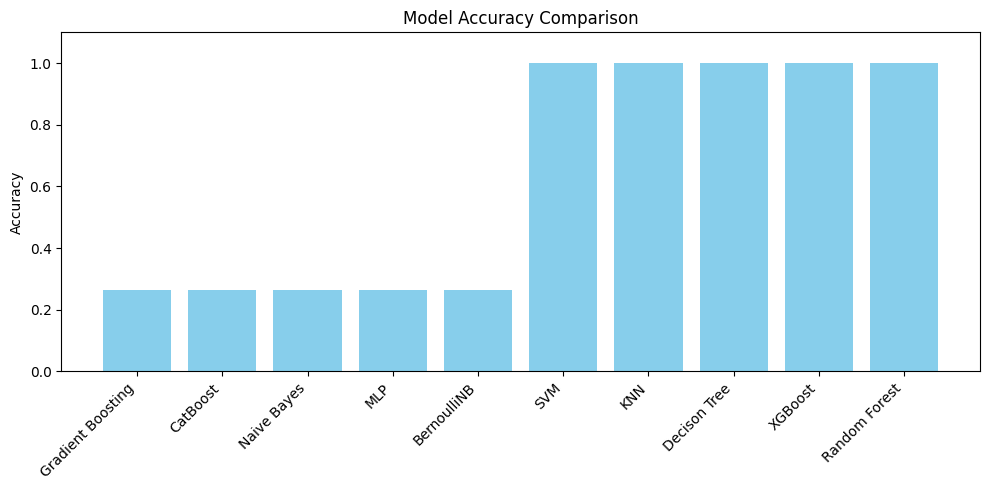

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a results DataFrame and display it
results_df = pd.DataFrame(results_df)
results_df = results_df.sort_values(by='Accuracy', ascending=True)
print(results_df)

# Optional: Plot bar graph for Accuracy comparison
plt.figure(figsize=(10, 5))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()